# How to render beautiful maps

Websites:
- Cartophy: https://scitools.org.uk/cartopy/docs/latest/gallery/index.html
- https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/
- https://towardsdatascience.com/creating-beautiful-topography-maps-with-python-efced5507aa3
- https://towardsdatascience.com/creating-beautiful-forest-maps-with-python-59a60fba3e27
- Animation: https://scitools.org.uk/cartopy/docs/latest/gallery/miscellanea/animate_surface.html
- [other examples](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.03-Working-with-Maps.html)
- Projections: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
- eScience tips: https://nordicesmhub.github.io/forces-2021/learning/example-notebooks/some-xarray-pandas-presentation_Sara.html

### Fancy plots
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

### Fancy Markdown
- https://towardsdatascience.com/enrich-your-jupyter-notebook-with-these-tips-55c8ead25255


In [13]:
import numpy as np
import netCDF4 as nc
import xarray as xr
xr.set_options(display_style='html')
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from owslib.wms import WebMapService
import os
from matplotlib.image import imread

## CMAP list

Options are: 'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'turbo', 'blues', 'brbg', 'bugn', 'bupu', 'cmrmap', 'gnbu', 'greens', 'greys', 'orrd', 'oranges', 'prgn', 'piyg', 'pubu', 'pubugn', 'puor', 'purd', 'purples', 'rdbu', 'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'reds', 'spectral', 'wistia', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'accent', 'dark2', 'paired', 'pastel1', 'pastel2', 'set1', 'set2', 'set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'blues6', 'fes', 'lapaz', 'boreal', 'browns1', 'blues7', 'lisbon', 'berlin', 'blues5', 'browns3', 'davos', 'batlowk', 'turbid', 'acton', 'browns2', 'haline', 'imola', 'batlow', 'deep', 'browns6', 'greens3', 'browns7', 'icefire', 'purples1', 'roma', 'algae', 'blues3', 'fire', 'browns5', 'greens1', 'browns4', 'blues2', 'greens8', 'reds2', 'speed', 'bamo', 'greens6', 'monocycle', 'reds3', 'cork', 'reds1', 'marine', 'lajolla', 'crest', 'tempo', 'bam', 'bamako', 'reds4', 'turku', 'thermal', 'reds5', 'glacial', 'curl', 'negpos', 'bukavu', 'oslo', 'vanimo', 'romao', 'vik', 'vlag', 'sunrise', 'sunset', 'oxy', 'delta', 'solar', 'div', 'yellows4', 'balance', 'drywet', 'rocket', 'blues4', 'matter', 'hawaii', 'yellows1', 'devon', 'ice', 'buda', 'broco', 'amp', 'yellows2', 'dusk', 'broc', 'yellows3', 'greens5', 'purples3', 'browns9', 'batloww', 'dense', 'browns8', 'purples2', 'corko', 'greens4', 'tokyo', 'oranges4', 'tofino', 'bilbao', 'phase', 'flare', 'viko', 'greens7', 'blues9', 'oranges1', 'nuuk', 'blues8', 'br', 'greens2', 'coldhot', 'oranges2', 'oleron', 'mako', 'blues1', 'oranges3', 'mono', 'stellar', 'colorblind', '538', 'classic', 'ggplot', 'qual1', 'bmh', 'qual2', 'tableau', 'default', 'colorblind10', 'flatui', 'seaborn'.

## Physical map

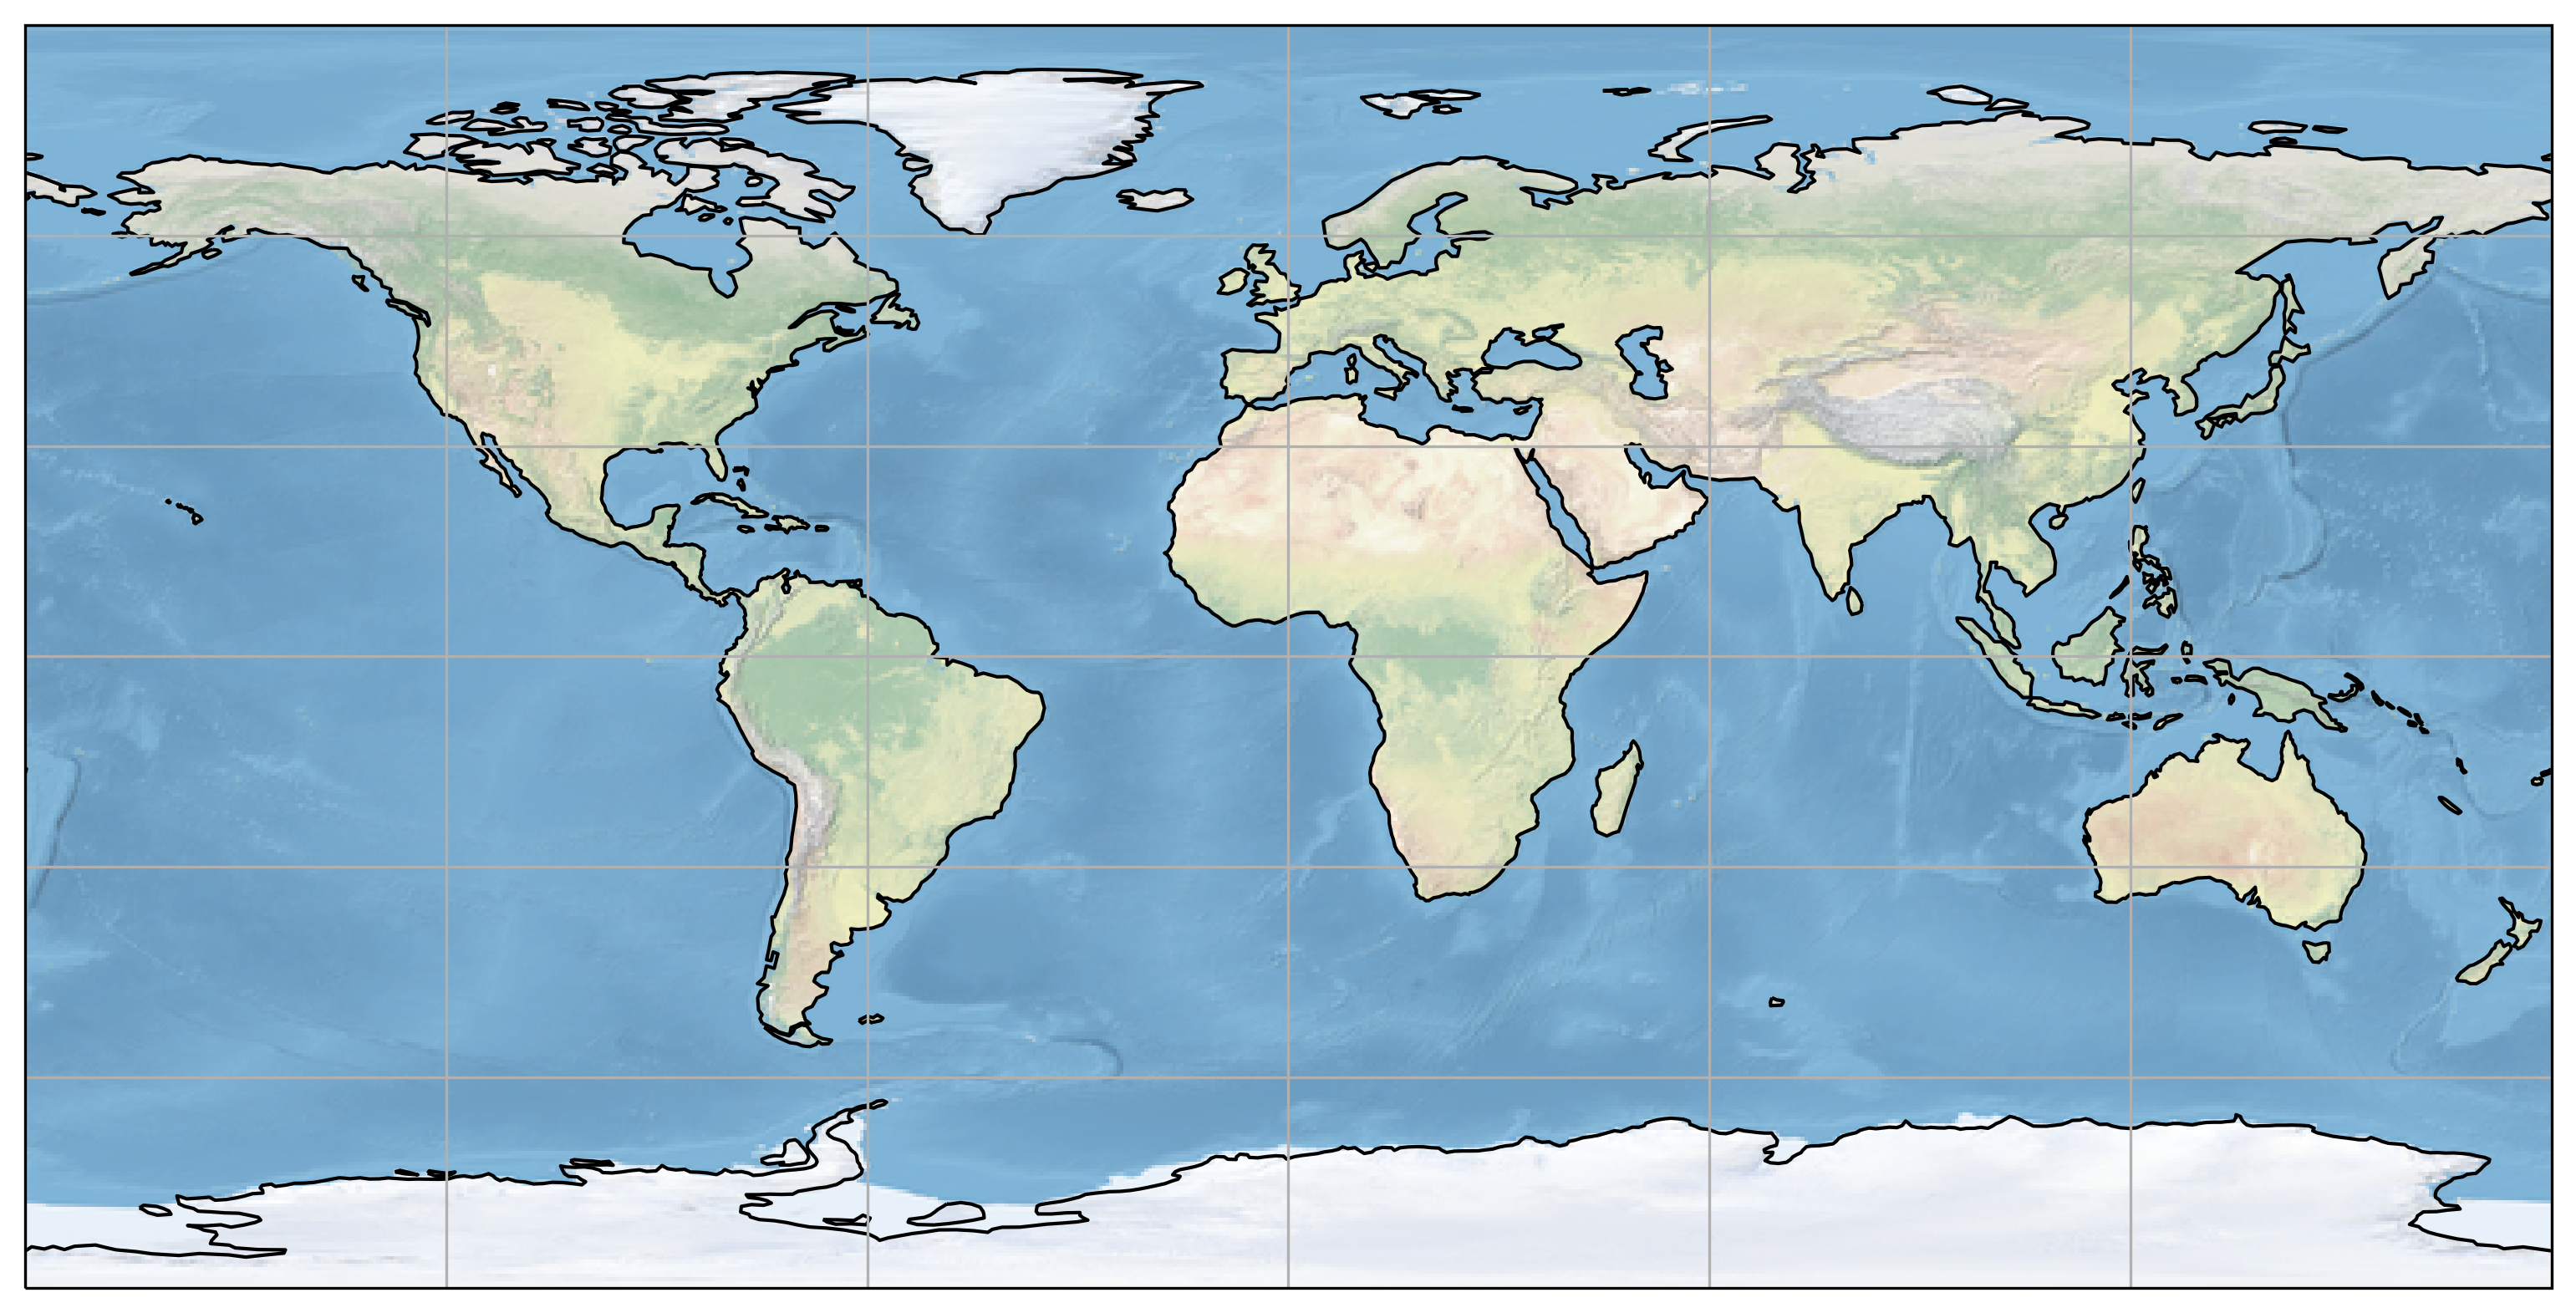

In [3]:
np.random.seed(1)
x = 360 * np.random.rand(50)
y = 180 * np.random.rand(50) - 90

fig = plt.figure(1, figsize=[13,13],dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())#central_longitude=-79))
ax.scatter(x, y,alpha=0)
ax.stock_img()
ax.coastlines()
ax.gridlines()

## Increasing map resolution
- https://gis.stackexchange.com/questions/313490/increasing-resolution-of-cartopy-stock-background

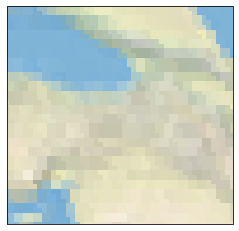

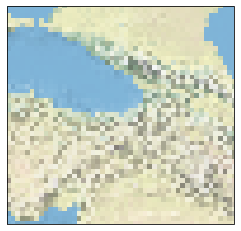

In [16]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
ax.set_extent([35,45,35,45])

plt.show()

ax = plt.axes(projection=ccrs.Mollweide())

fname = os.path.join('NE1_50M_SR_W/', 'NE1_50M_SR_W.tif')
ax.imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

ax.set_extent([35,45,36,46])

plt.show()

#fname = os.path.join('NE1_50M_SR_W/', 'NE1_50M_SR_W.tif')
#ax.imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

## Plot city lights

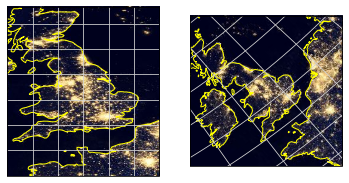

In [17]:
# Define resource for the NASA night-time illumination data.
base_uri = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer_name = 'VIIRS_CityLights_2012'

# Create a Cartopy crs for plain and rotated lat-lon projections.
plain_crs = ccrs.PlateCarree()
rotated_crs = ccrs.RotatedPole(pole_longitude=120.0, pole_latitude=45.0)

fig = plt.figure()

# Plot WMTS data in a specific region, over a plain lat-lon map.
ax = fig.add_subplot(1, 2, 1, projection=plain_crs)
ax.set_extent([-6, 3, 48, 58], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='yellow')
ax.gridlines(color='lightgrey', linestyle='-')
# Add WMTS imaging.
ax.add_wmts(base_uri, layer_name=layer_name)

# Plot WMTS data on a rotated map, over the same nominal region.
ax = fig.add_subplot(1, 2, 2, projection=rotated_crs)
ax.set_extent([-6, 3, 48, 58], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='yellow')
ax.gridlines(color='lightgrey', linestyle='-')
# Add WMTS imaging.
ax.add_wmts(base_uri, layer_name=layer_name)

plt.show()

## Schematic with features (lakes, rivers, land, ocean...)

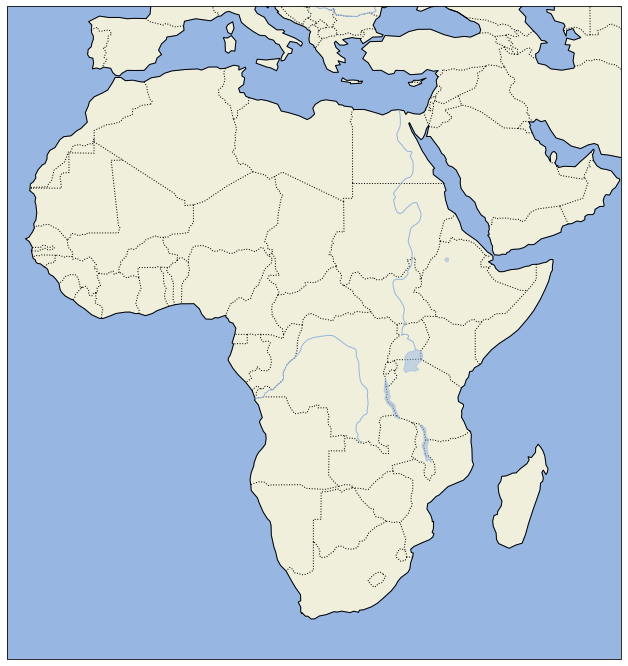

In [20]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.show()

## True example

In [18]:
#Import data
fn='data/surfdata_1.9x2.5_hist_16pfts_Irrig_CMIP6_simyr2000_c190304.nc'
dset_in = xr.open_dataset(fn)

#Set the longitude and latitude
dset_in['lsmlat'] = dset_in['LATIXY'].isel(lsmlon=0) #or dset_in['lsmlat'] = dset_in['lat']
dset_in['lsmlon'] = dset_in['LONGXY'].isel(lsmlat=0)

# Select PFT: percent plant functional type on the natural veg landunit (% of landunit)
# OBS! variable is centered, related to the ammount of land (full coloured even if )
pfts = dset_in.PCT_NAT_PFT
pfts = pfts.rename({'lsmlat':'lat','lsmlon':'lon'})

#Sum and mask PFT
boreal_pfts=[2,3,8,11,12]
pfts_b=pfts.sel(natpft=boreal_pfts)
pfts_b=pfts.sel(natpft=boreal_pfts)
pfts_b_mask = pfts_b.where(pfts_b>0.)
pfts_sum=pfts_b.sum('natpft')
pfts_sum=pfts_sum.where(pfts_sum>0.)

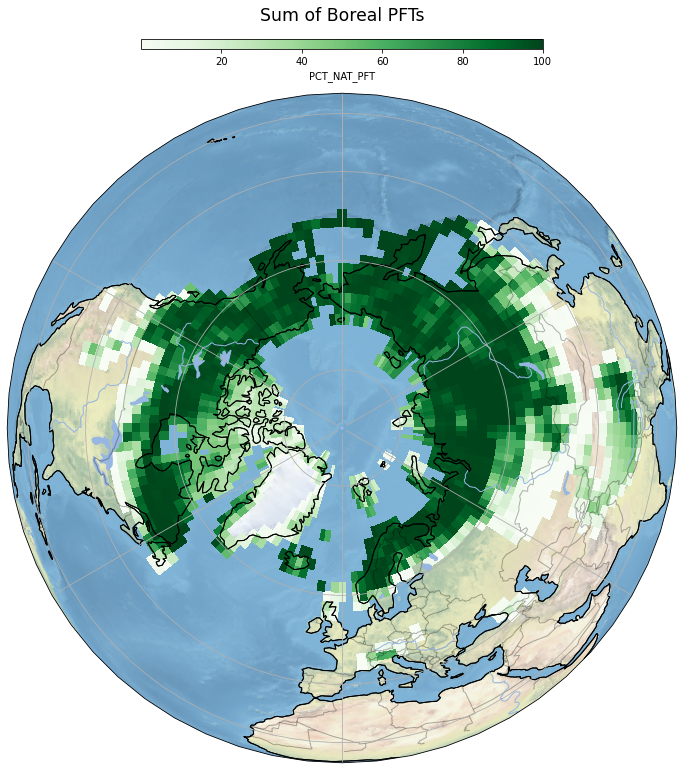

In [24]:
fig = plt.figure(1, figsize=[12,12]) #dpi=100
provinces_50m = cfeature.NaturalEarthFeature('cultural','admin_1_states_provinces_lines', '50m', facecolor='none')

ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ax.coastlines()
ax.gridlines()

pfts_sum.plot.pcolormesh(ax=ax, x='lon', y='lat', cmap='Greens', vmax=100,transform=ccrs.PlateCarree(), 
                         cbar_kwargs={'orientation': 'horizontal', 'shrink':0.6, 'aspect':40,"pad": -1.11}) #'label':'Percent Deviation', 'extend':'both',  'fraction':0.046})
ax.add_feature(cartopy.feature.OCEAN, zorder=0, alpha=0.3)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black', alpha=0.3)
#czorder = order of layers
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, alpha=0.3)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(provinces_50m)
url = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
#ax.add_wmts(url, 'VIIRS_CityLights_2012')#'BlueMarble_NextGeneration')
ax.stock_img()
plt.title("Sum of Boreal PFTs", y=1.1, size='xx-large')
plt.tight_layout()
plt.show()